<a href="https://colab.research.google.com/github/jin-raii/Handwritten-digits-using-Deep-Learning/blob/main/momo_and_chowmein_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow
from keras.models import Sequential
import cv2
import os
import matplotlib.pyplot as plt

In [3]:
dataset_path = '/content/drive/MyDrive/dataset'
folders = ['train/momo', 'train/chowmein', 'test/momo', 'test/chowmein']

In [4]:
# def resize_img(folder):
#     image_count = 0

#     for img_name in os.listdir(folder):
#         img_path = os.path.join(folder, img_name)

#         try:
#             img = cv2.imread(img_path)
#             if img is None:
#                 print(f"Skipping: {img_name} (Unreadable)")
#                 continue

#             img = cv2.resize(img, (150, 150))  # Resize to 150x150
#             cv2.imwrite(img_path, img)
#             image_count += 1
#         except Exception as e:
#             print(f"Error resizing {img_name}: {e}")

#     print(f"Resized {image_count} images in {folder}")


In [5]:
# for folder in folders:
#   resize_img(os.path.join(dataset_path, folder))

Resized 174 images in /content/drive/MyDrive/dataset/train/momo
Skipping: .ipynb_checkpoints (Unreadable)
Resized 174 images in /content/drive/MyDrive/dataset/train/chowmein
Resized 11 images in /content/drive/MyDrive/dataset/test/momo
Resized 11 images in /content/drive/MyDrive/dataset/test/chowmein


### Plot resized image


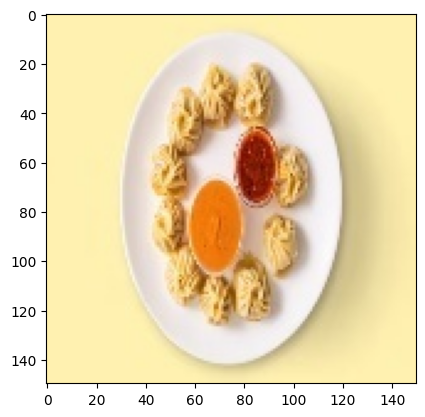

In [6]:
img_path = '/content/drive/MyDrive/dataset/train/momo/momo_1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Load Images using ImageDataGenerator
 - Loads images from dir in batch size instead of one by one
 - allows to rotate, zoom and flip
 - automatically labels images based on folder name e.g  Images in /train/momo are labeled as 'momo'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Define path for train and test dataset

In [8]:
train_path = dataset_path + '/train'
test_path = dataset_path  + '/test'
train_path

'/content/drive/MyDrive/dataset/train'

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# load train data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150), # img size
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

# load test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150), # img size
    batch_size=32,
    class_mode='categorical'
)

Found 348 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


class labels

In [10]:
train_generator.class_indices

{'chowmein': 0, 'momo': 1}

### Visualize Images

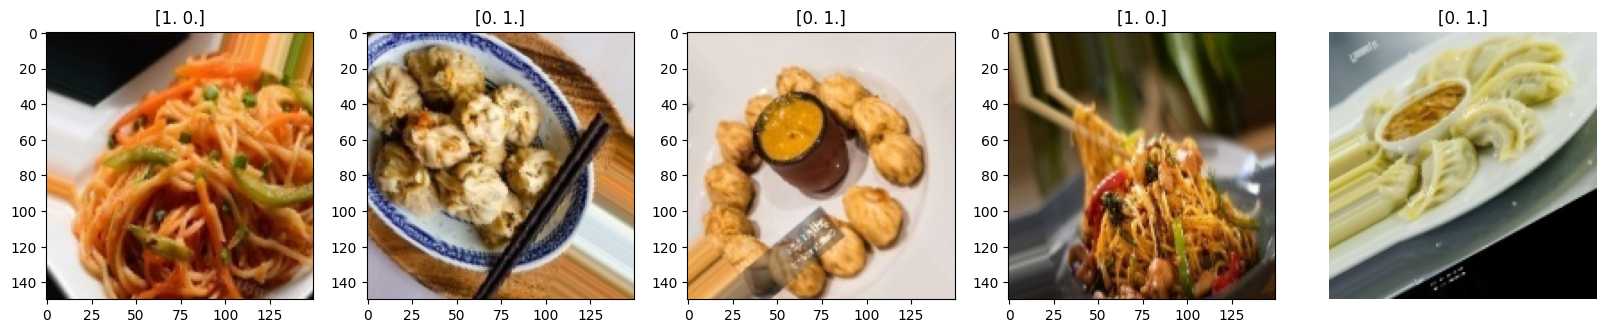

In [11]:
img, labels = next(train_generator)
fig, axis = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
  axis[i].imshow(img[i])
  axis[i].set_title(labels[i])
plt.axis('off')
plt.show()

### Build CNN model for classification using simple model architecture

In [12]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
model = models.Sequential([
    # extract features from images
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(units=100, activation='relu'),
    layers.Dropout(0.2), # ignore some neuron while training
    layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

earlyStopping = EarlyStopping(monitor='val_loss', patience=10)
mcp_save = ModelCheckpoint('/content/drive/MyDrive/dataset/model.weights.h5', save_best_only=True, monitor='val_loss')

history = model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[earlyStopping, mcp_save])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.4713 - loss: 3.4656

11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 721ms/step - accuracy: 0.4734 - loss: 3.3822 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5761 - loss: 0.6817

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 428ms/step - accuracy: 0.5771 - loss: 0.6800 - val_accuracy: 0.6818 - val_loss: 0.5614
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 346ms/step - accuracy: 0.7931 - loss: 0.5244 - val_accuracy: 0.6818 - val_loss: 0.5642
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.7736 - loss: 0.5153

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - accuracy: 0.7719 - loss: 0.5156 - val_accuracy: 0.6364 - val_loss: 0.5410
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.7729 - loss: 0.4838

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 361ms/step - accuracy: 0.7758 - loss: 0.4821 - val_accuracy: 0.7727 - val_loss: 0.4954
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 350ms/step - accuracy: 0.8699 - loss: 0.3459 - val_accuracy: 0.7727 - val_loss: 0.5373
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.8282 - loss: 0.4415 - val_accuracy: 0.7273 - val_loss: 0.6269
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.8785 - loss: 0.3799

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 336ms/step - accuracy: 0.8781 - loss: 0.3798 - val_accuracy: 0.7273 - val_loss: 0.4716
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.8054 - loss: 0.4219

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 427ms/step - accuracy: 0.8082 - loss: 0.4180 - val_accuracy: 0.8182 - val_loss: 0.3687
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - accuracy: 0.8172 - loss: 0.4094 - val_accuracy: 0.7727 - val_loss: 0.3757
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.8546 - loss: 0.3366 - val_accuracy: 0.8182 - val_loss: 0.4012
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8880 - loss: 0.2841

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 434ms/step - accuracy: 0.8820 - loss: 0.2950 - val_accuracy: 0.8636 - val_loss: 0.3311
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.8364 - loss: 0.4337 - val_accuracy: 0.8182 - val_loss: 0.3400
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step - accuracy: 0.8468 - loss: 0.3544 - val_accuracy: 0.9091 - val_loss: 0.3562
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.8613 - loss: 0.3064 - val_accuracy: 0.7727 - val_loss: 0.3447
Epoch 16/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9047 - loss: 0.2735

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 480ms/step - accuracy: 0.9059 - loss: 0.2699 - val_accuracy: 0.9091 - val_loss: 0.2627
Epoch 17/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.8562 - loss: 0.3265 - val_accuracy: 0.7273 - val_loss: 0.2928
Epoch 18/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.9151 - loss: 0.2375

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.9155 - loss: 0.2366 - val_accuracy: 0.9091 - val_loss: 0.2568
Epoch 19/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - accuracy: 0.9052 - loss: 0.2552 - val_accuracy: 0.8636 - val_loss: 0.2988
Epoch 20/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 0.8947 - loss: 0.2822 - val_accuracy: 0.9091 - val_loss: 0.2763
Epoch 21/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8654 - loss: 0.3102

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.8692 - loss: 0.3036 - val_accuracy: 0.9091 - val_loss: 0.2275
Epoch 22/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.9160 - loss: 0.2022 - val_accuracy: 0.8182 - val_loss: 0.2498
Epoch 23/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 402ms/step - accuracy: 0.9357 - loss: 0.1747 - val_accuracy: 0.9091 - val_loss: 0.2319
Epoch 24/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - accuracy: 0.9116 - loss: 0.2428 - val_accuracy: 0.8182 - val_loss: 0.2582
Epoch 25/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step - accuracy: 0.9259 - loss: 0.1940 - val_accuracy: 0.8182 - val_loss: 0.2365
Epoch 26/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - accuracy: 0.9445 - loss: 0.1617 - val_accuracy: 0.9091 - val_loss: 0.4397
Epoch 27/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9357 - loss: 0.1538

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 604ms/step - accuracy: 0.9353 - loss: 0.1538 - val_accuracy: 0.8636 - val_loss: 0.2242
Epoch 28/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 369ms/step - accuracy: 0.9547 - loss: 0.1469 - val_accuracy: 0.9091 - val_loss: 0.2605
Epoch 29/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.9604 - loss: 0.1245 - val_accuracy: 0.9091 - val_loss: 0.2634
Epoch 30/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.9206 - loss: 0.2117

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 532ms/step - accuracy: 0.9201 - loss: 0.2126 - val_accuracy: 0.9091 - val_loss: 0.2059
Epoch 31/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 385ms/step - accuracy: 0.9624 - loss: 0.1452 - val_accuracy: 0.9091 - val_loss: 0.2572
Epoch 32/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.9544 - loss: 0.1396

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.9539 - loss: 0.1396 - val_accuracy: 0.8636 - val_loss: 0.2018
Epoch 33/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9437 - loss: 0.1280

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step - accuracy: 0.9431 - loss: 0.1298 - val_accuracy: 0.8636 - val_loss: 0.2000
Epoch 34/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.9330 - loss: 0.1975 - val_accuracy: 0.9091 - val_loss: 0.2606
Epoch 35/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.9259 - loss: 0.1860 - val_accuracy: 0.9091 - val_loss: 0.5928
Epoch 36/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - accuracy: 0.9279 - loss: 0.2421 - val_accuracy: 0.9091 - val_loss: 0.3133
Epoch 37/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 328ms/step - accuracy: 0.9383 - loss: 0.1592 - val_accuracy: 0.9091 - val_loss: 0.3771
Epoch 38/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 0.9357 - loss: 0.1488 - val_accuracy: 0.8636 - val_loss: 0.3302
Epoch 39/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - accuracy: 0.9442 - loss: 0.1184 - val_accuracy: 0.8182 - val_loss: 0.2881
Epoch 40/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.9500 - loss: 0.1555 - val_accuracy:

In [14]:
test_loss, test_acc = model.evaluate(test_generator)
test_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9091 - loss: 0.2399


0.9090909361839294

### plot training history

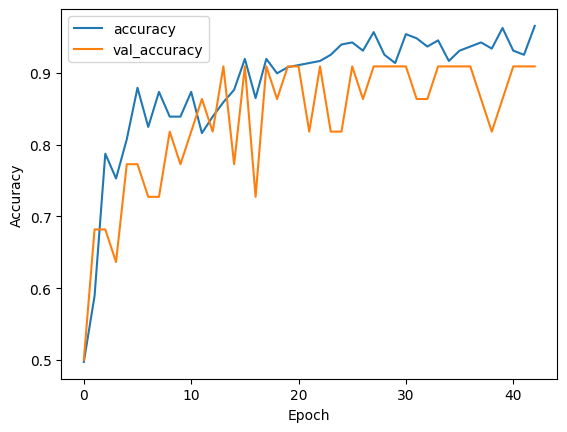

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Save Model for testing purpose still need to increase accuracy of model

In [16]:
model.save(dataset_path + 'my_model.h5')

In [17]:
my_model = models.load_model(dataset_path + 'my_model.h5')
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 147968)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │      14,796,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,890,352 (56.80 MB)

 Trainable params: 14,890,350 (56.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Load momo image from Drive

In [18]:
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

In [23]:
def prepare_image(path):
    img = cv2.imread(path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (150, 150))  # Resize to 150x150
    img = img.astype("float32") / 255.0  # Normalize
    img = img_to_array(img)  # Convert to array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [24]:
m_img = prepare_image('/content/drive/MyDrive/dataset/momos.jpg')
m_img.shape

(1, 150, 150, 3)

In [25]:
my_model.predict(m_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


array([[0.1653265 , 0.83467346]], dtype=float32)

In [26]:
np.argmax(my_model.predict(m_img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


np.int64(1)

In [27]:
train_generator.class_indices

{'chowmein': 0, 'momo': 1}

### Plot True vs Predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

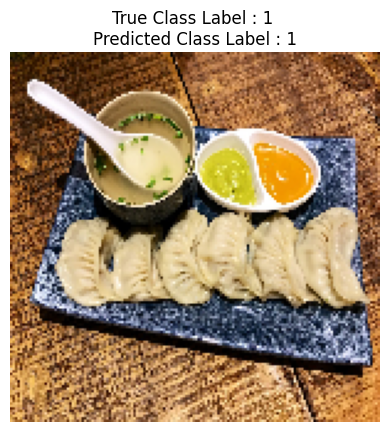

In [46]:
plt.imshow(m_img[0])
plt.title(f'True Class Label : {train_generator.class_indices["momo"]} \nPredicted Class Label : {np.argmax(my_model.predict(m_img))}')
plt.axis('off')

### Chowmein pic

In [48]:
chowmein = prepare_image('/content/drive/MyDrive/dataset/chowmein.jpg')
chowmein.shape

(1, 150, 150, 3)

In [49]:
np.argmax(my_model.predict(chowmein))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


np.int64(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

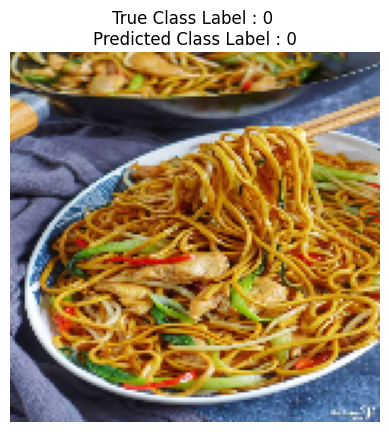

In [50]:
plt.imshow(chowmein[0])
plt.title(f'True Class Label : {train_generator.class_indices["chowmein"]} \nPredicted Class Label : {np.argmax(my_model.predict(chowmein))}')
plt.axis('off')